In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint

# Multivariate Optimization

## Example 1:

In [4]:
def objective(variables):
   x,y = variables
   return (x-y)**2+1/3*(x+y-10)**2

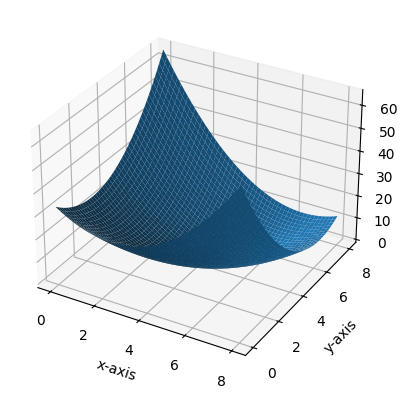

In [6]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0,8)
y = np.linspace(0,8)

X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y,objective((X,Y)))

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

plt.show()

In [5]:
S = minimize(objective,(0,0),method="Powell"); S

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [ 5.000e+00  5.000e+00]
     nit: 4
   direc: [[ 1.071e+00  1.607e+00]
           [ 1.984e-03 -4.960e-04]]
    nfev: 82

## Example 2:

In [7]:
def profit(production_rate,profit_per_product):
    
    return -np.sum(production_rate*profit_per_product)

In [9]:
profit_per_product = np.array([90,60,45])

lb = [0,0,0]
ub = [np.inf,np.inf,np.inf]

B = Bounds(lb,ub)

A = np.zeros((5,3))

A[0,:] = np.array([1.5 , 1.0 , 0.0 ])
A[1,:] = np.array([2.0 , 0.0 , 1.5 ])
A[2,:] = np.array([0.75, 3.0 , 0.0 ])
A[3,:] = np.array([1.25, 0.75, 1.0 ])
A[4,:] = np.array([1.0 , 0.0 , 2.0 ])

lb = [0, 0, 0, 0, 0]
ub = [450, 250, 800, 450, 600]

C = LinearConstraint(A,lb,ub)

H = lambda x,v: np.zeros((3,3))

T = minimize(profit,np.zeros(3),args=(profit_per_product,),method='trust-constr',constraints=C,bounds=B,hess=H); T

           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: -25374.997592114447
                 x: [ 1.250e+02  2.354e+02  6.244e-05]
               nit: 17
              nfev: 56
              njev: 14
              nhev: 14
          cg_niter: 15
      cg_stop_cond: 4
              grad: [-9.000e+01 -6.000e+01 -4.500e+01]
   lagrangian_grad: [ 3.332e-09 -8.678e-10 -6.093e-09]
            constr: [array([ 4.229e+02,  2.500e+02,  8.000e+02,  3.328e+02,
                            1.250e+02]), array([ 1.250e+02,  2.354e+02,  6.244e-05])]
               jac: [array([[ 1.500e+00,  1.000e+00,  0.000e+00],
                           [ 2.000e+00,  0.000e+00,  1.500e+00],
                           ...,
                           [ 1.250e+00,  7.500e-01,  1.000e+00],
                           [ 1.000e+00,  0.000e+00,  2.000e+00]]), array([[ 1.000e+00,  0.000e+00,  0.000e+00],
                           [ 0.000e+00,  1.000